# Bayes Rule Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

In [2]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 3
rng = np.random.default_rng(RANDOM_SEED)

# Exercise 1: Bayesian intuition
Sometimes Bayes Rule is used to explain how people learn, say a child learning what foods they like. It's not clear if this mathematically or scientifically true, but it is an interesting philosophy and thought experiment.

Think through a situation in your life where you had a prior belief, received new information, and updated your belief. Share this experience your experience in the discourse. How does this intuition map to the idea of a posterior update?

# Exercise 2 : Prior specification
You're a scientist measuring the height of adult humans in meters. 
* What would an uninformative prior be for the height of an adult?
* What would an informative prior be for the height of an adult?

Sketch each on a piece of paper or on your computer. Justify your choices, what information is included in the informative prior that is not included in the uninformative prior?

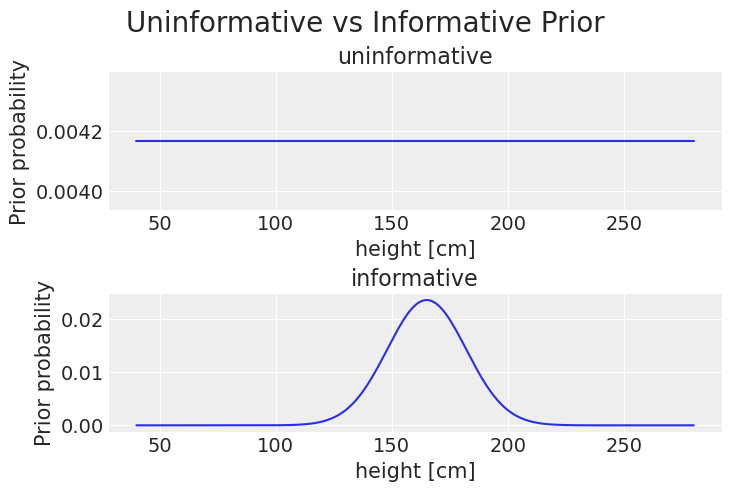

In [3]:
x_vals = np.linspace(40, 280, 240)
uninformative_prior = np.ones_like(x_vals) / len(x_vals)
informative_prior = stats.norm.pdf(x_vals, loc= 165, scale= 17)

fig, ax = plt.subplots(nrows = 2)
ax[0].plot(x_vals, uninformative_prior)
ax[0].set_ylabel("Prior probability")
ax[0].set_xlabel("height [cm]")
ax[0].set_title("uninformative")
ax[1].plot(x_vals, informative_prior)
ax[1].set_ylabel("Prior probability")
ax[1].set_xlabel("height [cm]")
ax[1].set_title("informative")
fig.suptitle("Uninformative vs Informative Prior", fontsize=20);

These are two possible examples of informative and non-informative priors. For the non-informative we give the same probability to all possible values (or use a normal with huge standard deviation to avoid improper priors) whereas for the informative one we use a Normal distribution to encode the prior knowledge that it is possible to be 2 meters tall, but it is not as likely as being 180cm or 160cm tall.

# Exercise 3: Likelihood Calculations
## Exercise 3a
1. Instantiate a `N(0,10)` distribution using SciPy
2. Calculate the likelihood for each of the following values
    * 0
    * -1
    * 1
    * 100

Do the results returned make sense? Why or why not?

## Exercise 3b
1. Also using SciPy, use the A/B test data calculate the likelihood of the observations in the `ab_test_data.csv` file (which can be found in the data folder in the Distributions lesson) given the following conversion rates:
  * 5%
  * 10%
  * 50%

For this you'll need to recall what likelihood function most appropriate for this data and instatiate a SciPy distribution with the provided parameters,
then evaluate that on your observations to get their likelihood. Remember the likelihood is $p(data|parameters)$.

# 3a

In [4]:
values = [0, -1, 1, 100]
normal = stats.norm(loc=0, scale=10)

print("Probability density of N(0, 10) at:")
for value in values:
    print(f"    x={value:>3} -> pdf={normal.pdf(value)}")

Probability density of N(0, 10) at:
    x=  0 -> pdf=0.03989422804014327
    x= -1 -> pdf=0.03969525474770118
    x=  1 -> pdf=0.03969525474770118
    x=100 -> pdf=7.69459862670642e-24


The pdf at 0 having the highest value makes perfect sense, as it corresponds to the mode of the distribution.
It is also symmetric, so pdf at +1 and -1 is exactly the same, up to the last digit, also as expected.

This Normal distribution has sigma=10, which is 10 times larger than +/-1, and so it also makes sense for the pdf at +/-1 to be very close
to the value at 0. Similarly, 100 is very far from the mode of the distribution (it is 10 sigmas away).
We can use `.ppf` for example to get the interval that contains 90% of the probability for the distribution N(0,10) (see code below).
x=100 is very far from this range, so it is expected for its probability to be neglibible.

In [5]:
normal.ppf([.05, .95])

array([-16.44853627,  16.44853627])

# 3b

First get the count of conversions and empirical probability. We use that to create a binomial distribution and draw some samples just to see what 10,000 visitors and conversions could look like.

In [6]:
conversions = pd.read_csv("../4_Distributions/data/ab_test_data.csv", names=['conversions'])
n_successes = conversions.sum().item()

for conversion_rate in (5, 10, 50):
    likelihood = stats.binom(p=conversion_rate/100, n=len(conversions)).pmf(n_successes)
    print(f"Likelihood of the observations in ab_test_data.csv given a conversion rate of {conversion_rate:>2g}%: {likelihood:.5g}")

Likelihood of the observations in ab_test_data.csv given a conversion rate of  5%: 0.064871
Likelihood of the observations in ab_test_data.csv given a conversion rate of 10%: 0.11482
Likelihood of the observations in ab_test_data.csv given a conversion rate of 50%: 1.468e-19


Because 10% is closer to our actual conversion rate (8%) it is a tiny bit more likely that 5%, but both are 
quite probable. 50% on the other hand, is extremely unlikely as it sits very far from the mean of our distribution, which is reflected in a likelihood near 0.

# Exercise 4: Estimating conversion rates yourself
We've deployed three other websites. You'll find the data for Website A, B, and C in the exercises directory.

## Estimating Website A
Use the full Bayesian modeling workflow to estimate the conversion rate. Generate a posterior plot and calculate the 94% HDI using ArviZ

## Estimating Website B
Do the same for Website B, but compare it to Website A. Is the estimate conversion rate different? How sure we of this conversion rate, more than Website A, or less? Why might this be the case?

## Estimating Website C
Your boss now asks you to compare Website C with B. Your boss wants to know
* What is the conversion rate of Website C?
* Should the company deploy Website C? Why or why not?


In [7]:
websiteA = pd.read_csv('data/website_a.csv', index_col = 0)
websiteB = pd.read_csv('data/website_b.csv', index_col = 0)
websiteC = pd.read_csv('data/website_c.csv', index_col = 0)

websiteB.info()
websiteA.info()
websiteC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   website_b  10000 non-null  int64
dtypes: int64(1)
memory usage: 156.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   website_a  100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   website_c  10000 non-null  int64
dtypes: int64(1)
memory usage: 156.2 KB


In [8]:
observed_visits = websiteA.sum()
number_of_visits = len(websiteA)

with pm.Model() as websites_analisys:
    #prior
    conversion_rate = pm.Beta('conversion_rate',alpha=21, beta=10.5)
    
    pm.Binomial('likelihood', p=conversion_rate, n=number_of_visits, observed=observed_visits)
    
    dataA = pm.sample(tune= 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [9]:
observed_visits = websiteB.sum()
number_of_visits = len(websiteB)

with pm.Model() as websites_analisys:
    #prior
    conversion_rate = pm.Beta('conversion_rate',alpha=21, beta=10.5)

    pm.Binomial('likelihood', p=conversion_rate, n=number_of_visits, observed=observed_visits)
    
    dataB = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [10]:
observed_visits = websiteC.sum()
number_of_visits = len(websiteC)

with pm.Model() as websites_analisys:
    #prior
    conversion_rate = pm.Beta('conversion_rate',alpha=21, beta=10.5)
    
    pm.Binomial('likelihood', p=conversion_rate, n=number_of_visits, observed=observed_visits)
    
    dataC = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


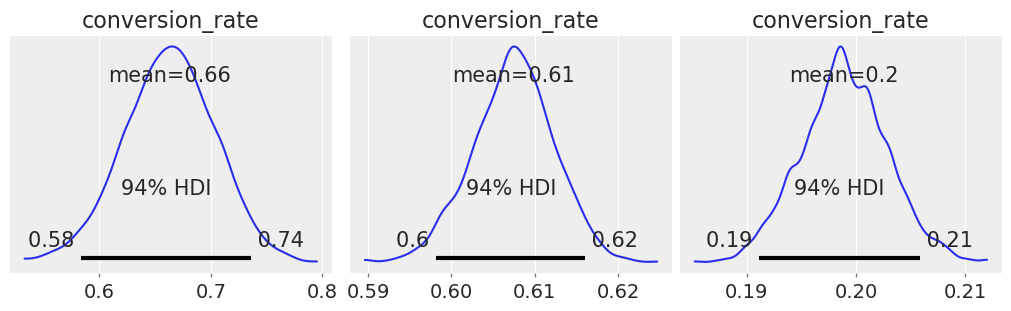

In [11]:
_, axes = plt.subplots(1, 3, figsize=(10, 3))
az.plot_posterior(dataA, ax=axes[0])
az.plot_posterior(dataB, ax=axes[1])
az.plot_posterior(dataC, ax=axes[2]);

As we can see from the plots above, our websites are quite good, what a conversion rate on both A and B!

Both A and B have similar mean, but the KDE plot and the 94% HDI indicate that our predictions for website B should be much more precise. This is caused by sample size, dataset for website A was only 100 entries long, which in result gives us huge uncertainty. Website B had 10 thousand datapoints, and it allowed us to be very confident about the results.

Note however that the higher uncertainty in case of website A means it could both end up having better or worse results than B if we continued to gather data, it is not a clear choice.

On the other hand, the situation is completely different with website C. In this case we also have a lot of data to work with, and our estimation is that there's 94% confidence that the real conversion rate is in between 0.19 and 0.21. For a website it's really good score, but if we're asked by our boss if we should launch website B or C I think there's not a moment of hesitation. Website B is an absolute beast, with conversion rate around 61%!


# Exercise 5: Group Exercise
This is a group exercise on Discourse.

1. Generate some fake conversion picking your own conversion rate and sample size
2. Post the CSV on discourse. Ask someone to share their data
3. See if you can recover the parameters and confirm with your colleague. They should do the same

In [12]:
# To generate dataset consisting of 0s and 1s we can use numpy.random.choice function.
data = rng.choice([0, 1], size=10000, p=[.89, .11])

df = pd.DataFrame(data, columns=['value'])
df.to_csv('practice_conversion.csv')

We can double check things make sense computing the sum of the generated data.
As you can see it is around 11%, so our intended conversion rate should have been achieved.

In [13]:
data.sum()

1087